<a href="https://www.kaggle.com/code/vtinnguyn/ph-n-t-ch-d-li-u?scriptVersionId=96808001" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-btnhom/data.csv


**Thêm các thư viện cần thiết**

In [2]:
import numpy as np #hỗ trợ thêm cho các mảng và ma trận lớn, đa chiều, cùng với một bộ sưu tập lớn các hàm toán học cấp cao để hoạt động trên các mảng này
import pandas as pd # nó cung cấp các cấu trúc dữ liệu và các phép toán để thao tác với các bảng số và chuỗi thời gian
from matplotlib import pyplot as plt #một thư viện vẽ đồ thị cho ngôn ngữ lập trình Python và phần mở rộng toán học số NumPy của nó
import seaborn as sns #cung cấp giao diện để vẽ các thống kê
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/data-btnhom/data.csv") #Đọc tệp các giá trị được phân tách bằng dấu phẩy (csv) vào DataFrame
df.head() #Hàm này trả về n hàng đầu tiên cho đối tượng dựa trên vị trí. 

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.info() 
#In tóm tắt ngắn gọn về DataFrame. Phương thức này in thông tin về DataFrame bao gồm loại chỉ mục và các cột, các giá trị không rỗng và mức sử dụng bộ nhớ.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

**Xử lý dữ liệu. Thay thế các khoảng trắng của dữ liệu thành "_". Chuyển dữ liệu từ in hoa về chữ thường**

In [5]:
df.columns = df.columns.str.lower().str.replace(' ','_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ','_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


**Kiểm tra dữ liệu. Đếm dữ liệu trống**

In [6]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

**Xóa dữ liệu trống và kiểm tra lại tập dữ liệu**

In [7]:
df = df.dropna(axis=0) #xóa các dòng dữ liệu trống, v v 

In [8]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
market_category      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

**Vẽ biểu đồ phân phối tập dữ liệu**

<AxesSubplot:xlabel='msrp', ylabel='Count'>

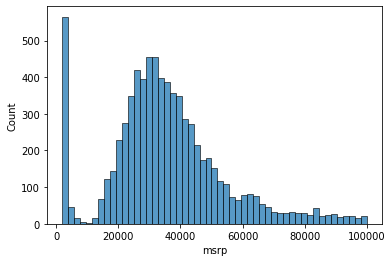

In [9]:
sns.histplot(df.msrp[df.msrp<100000])

<AxesSubplot:xlabel='msrp', ylabel='Count'>

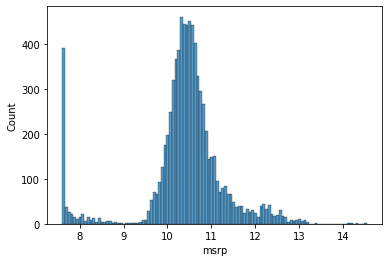

In [10]:
log_price = np.log1p(df.msrp)
#Trả về lôgarit tự nhiên của một cộng với mảng đầu vào, tính theo phần tử 
sns.histplot(log_price)

**Đếm các giá trị trong thuộc tính**

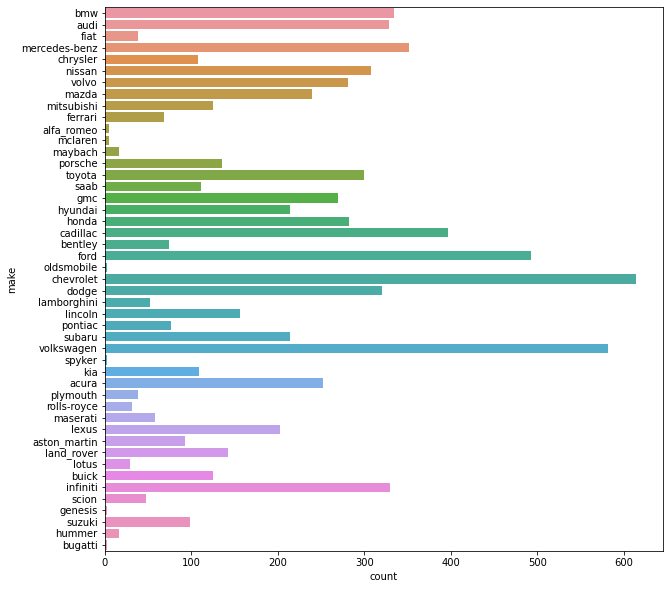

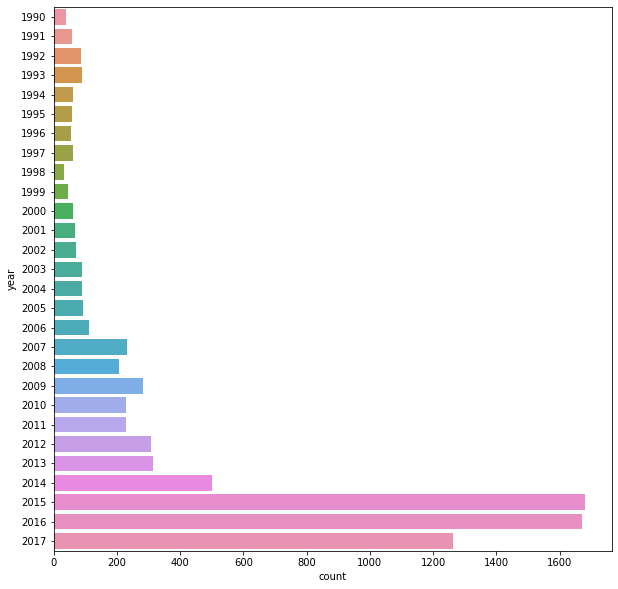

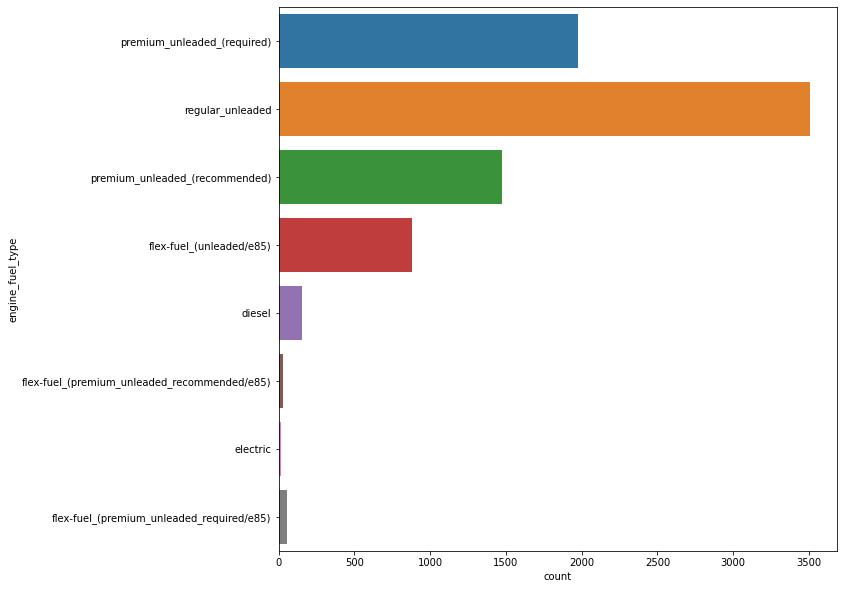

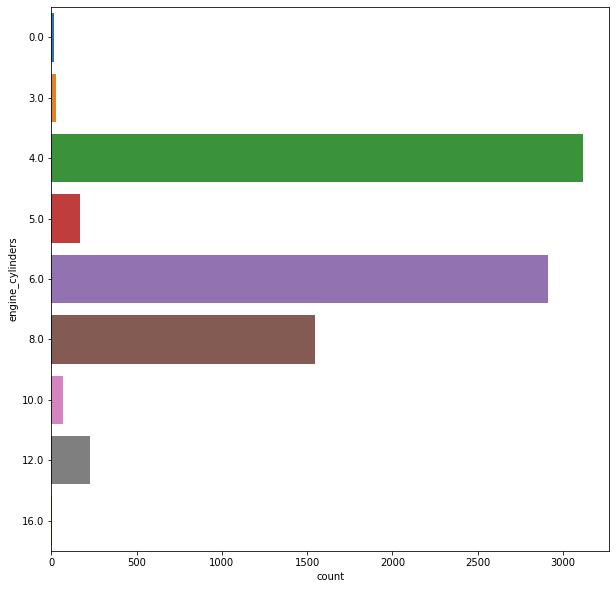

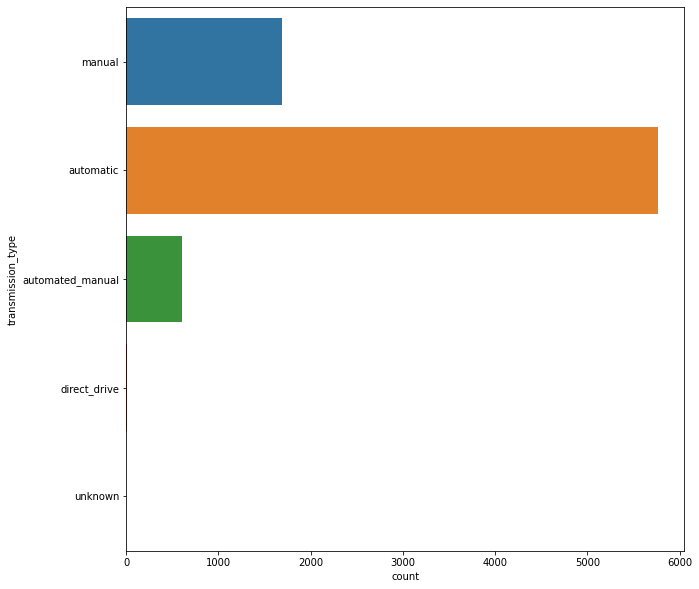

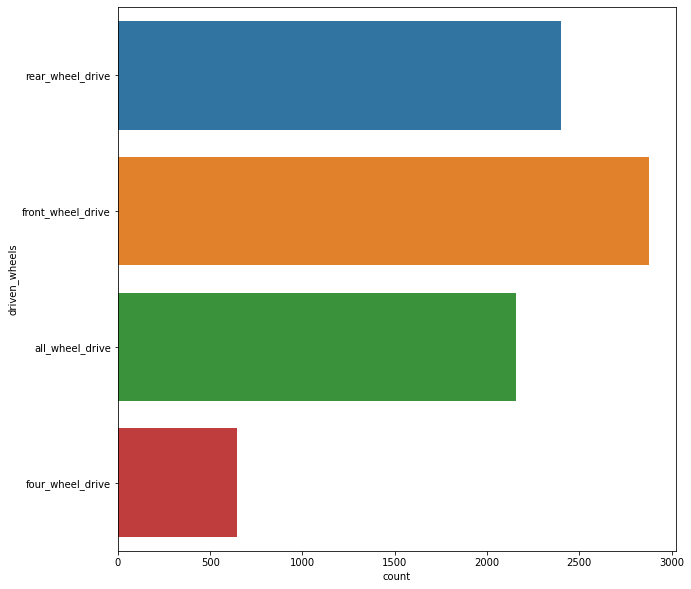

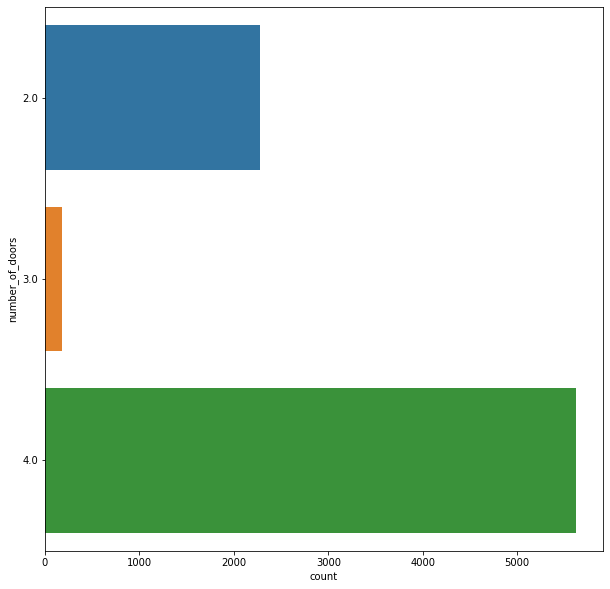

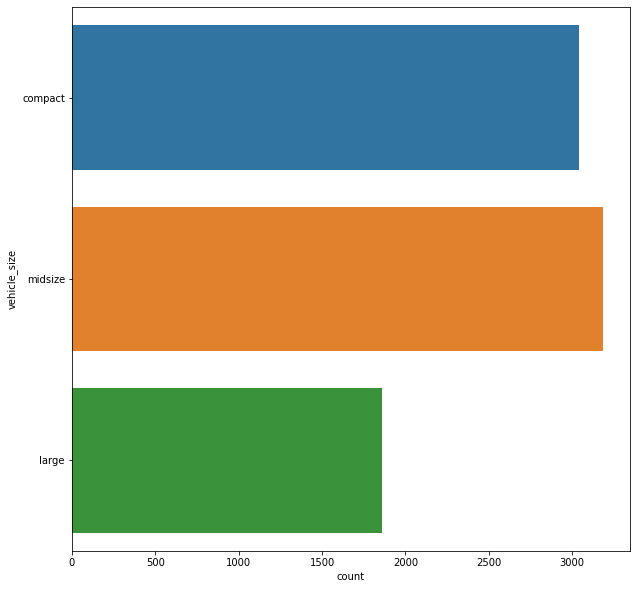

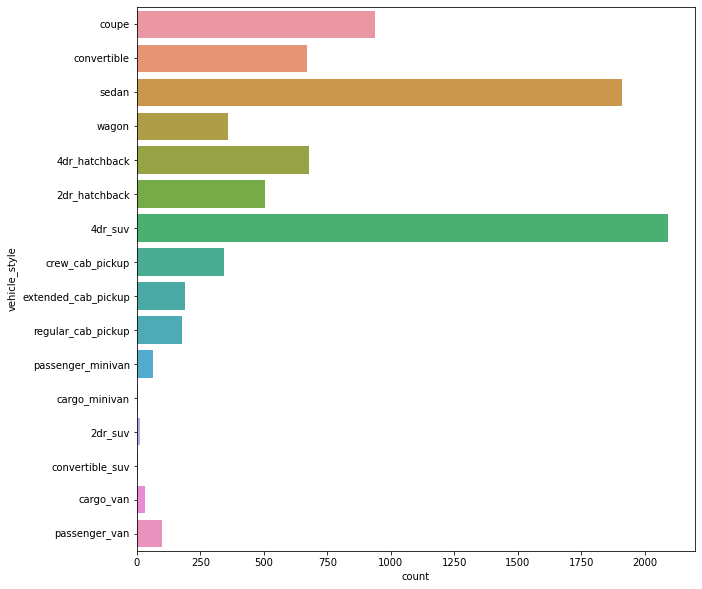

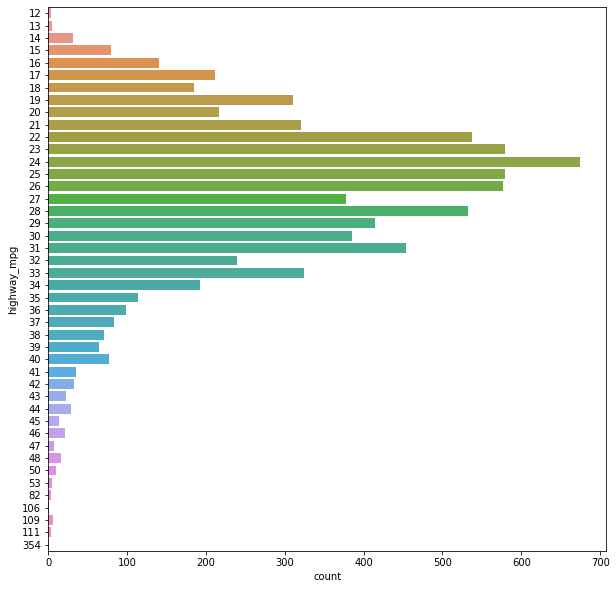

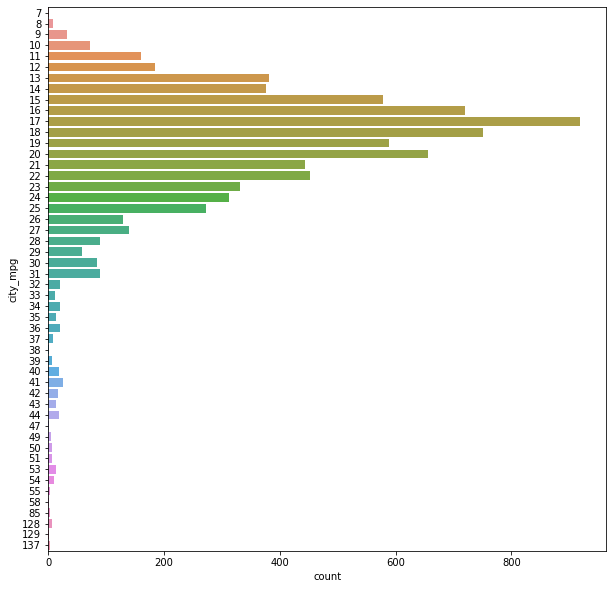

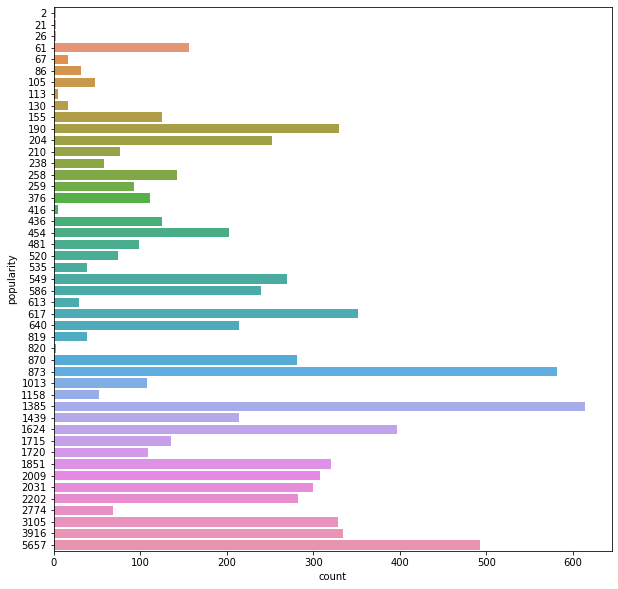

In [11]:
plt.figure(figsize = (10,10))
sns.countplot(data = df, y = df.make);

plt.figure(figsize = (10,10))
sns.countplot(data = df, y = df.year);

plt.figure(figsize = (10,10))
sns.countplot(data = df, y = df.engine_fuel_type );

plt.figure(figsize = (10,10))
sns.countplot(data = df, y = df.engine_cylinders );

plt.figure(figsize = (10,10))
sns.countplot(data = df, y = df.transmission_type);

plt.figure(figsize = (10,10))
sns.countplot(data = df, y = df.driven_wheels);

plt.figure(figsize = (10,10))
sns.countplot(data = df, y = df.number_of_doors );

plt.figure(figsize = (10,10))
sns.countplot(data = df, y = df.vehicle_size );

plt.figure(figsize = (10,10))
sns.countplot(data = df, y = df.vehicle_style);

plt.figure(figsize = (10,10))
sns.countplot(data = df, y = df.highway_mpg );

plt.figure(figsize = (10,10))
sns.countplot(data = df, y = df.city_mpg);

plt.figure(figsize = (10,10))
sns.countplot(data = df, y = df.popularity);

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8084 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               8084 non-null   object 
 1   model              8084 non-null   object 
 2   year               8084 non-null   int64  
 3   engine_fuel_type   8084 non-null   object 
 4   engine_hp          8084 non-null   float64
 5   engine_cylinders   8084 non-null   float64
 6   transmission_type  8084 non-null   object 
 7   driven_wheels      8084 non-null   object 
 8   number_of_doors    8084 non-null   float64
 9   market_category    8084 non-null   object 
 10  vehicle_size       8084 non-null   object 
 11  vehicle_style      8084 non-null   object 
 12  highway_mpg        8084 non-null   int64  
 13  city_mpg           8084 non-null   int64  
 14  popularity         8084 non-null   int64  
 15  msrp               8084 non-null   int64  
dtypes: float64(3), int64(5)

**Chia tập dữ liệu thành train test**

In [13]:
n = len(df)
n_val = int(0.2*n)
n_test = int(0.2*n)
n_train = n - (n_val + n_test)
np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [14]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [15]:
del df_train['msrp'] # del xóa các đối tượng trong python
del df_val['msrp']
del df_test['msrp']

**Khởi tạo hàm**

In [16]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [17]:
 base = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']
df_num = df_train[base]

In [18]:
df_num = df_num.fillna(0)

In [19]:
X_train = df_num.values

In [20]:
w_0, w = train_linear_regression(X_train, y_train)

In [21]:
y_pred = w_0 + X_train.dot(w)

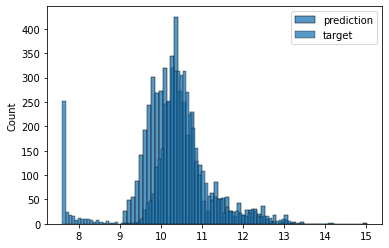

In [22]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='target')
plt.legend()
#biểu đồ so sánh giữa dự đoán so với mục tiêu

In [23]:
def rmse(y, y_pred): #tính lỗi trung bình
    error = y_pred - y
    mse = (error **2).mean()
    return np.sqrt(mse)

In [24]:
rmse(y_train, y_pred)

0.6727491278437512

In [25]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    df['age'] = 2022 - df.year
    features.append('age')
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [26]:
X_train = prepare_X(df_train)
w_0 , w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 0.468328023531793


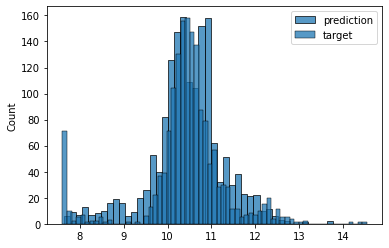

In [27]:
sns.histplot(y_pred,label='prediction')
sns.histplot(y_val, label='target')
plt.legend()

In [28]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    df['age'] = 2022 - df.year
    features.append('age')
    
    for v in [2,3,4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors']==v).astype(int)
        features.append(feature)
        
    for v in ['regular_unleaded', 'premium_unleaded_(required)',
             'premium_unleaded_(recommended)','flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type']==v).astype(int)
        features.append(feature)
        
    for v in ['automatic','manual','automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type']==v).astype(int)
        features.append(feature)
        
    for v in ['front_wheel_drive','rear_wheel_drive','all_wheel_drive','four_wheel_drive']:
        feature = 'is_driven_wheels_%s' % v
        df[feature] = (df['driven_wheels']==v).astype(int)
        features.append(feature)
        
    for v in ['crossover','flex_fuel','luxury','luxury,performance','hatchback']:
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size']==v).astype(int)
        features.append(feature)
        
    for v in ['sedan','4dr_suv','coupe','convertible','4dr_hatchback']:
        feature = 'is_type_%s' % v
        df[feature] = (df['vehicle_style']==v).astype(int)
        features.append(feature)
        
    df_num =df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [29]:
def train_linear_regression_reg(X,y,r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)
    reg = r*np.eye(XTX.shape[0])
    XTX = XTX + reg
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0],w[1:]

In [30]:
X_train = prepare_X(df_train)
w_0,w = train_linear_regression_reg(X_train, y_train, r=0.001)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 0.41458546828369847


In [31]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0.000001,0.001,0.001,0.01,0.1,1,5,10]:
    w_0,w = train_linear_regression_reg(X_train,y_train,r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val,y_pred))

 1e-06 0.4145898055182291
 0.001 0.41458546828369847
 0.001 0.41458546828369847
  0.01 0.41455153097503156
   0.1 0.4142770620329669
     1 0.41435103855769334
     5 0.4202860042931523
    10 0.42890590769323284


In [32]:
X_train = prepare_X(df_train)
w_0,w =train_linear_regression_reg(X_train, y_train,r=0.01)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val,y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test,y_pred))

validation: 0.41455153097503156
test: 0.4095180897978892


In [33]:
ad = {
    'city_mpg':18,
    'driven_wheels':'all_wheel_drive',
    'engine_cylinders':6.0,
    'engine_fuel_type':'regular_unleaded',
    'engine_hp':268.0,
    'highway_mpg':25,
    'make':'toyota',
    'market_category':'crossover,performance',
    'model':'venza',
    'number_of_doors':4.0,
    'popularity':2031,
    'transmission_type':'automatic',
    'vehicle_size':'midsize',
    'vehicle_style':'wagon',
    'year':2013
}

In [34]:
df_test = pd.DataFrame([ad])
X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
suggestion = np.expm1(y_pred)
suggestion

array([33067.70982791])